In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Prepare Data

## Import

In [66]:
df1 = pd.read_csv(r'C:\Users\dell\Desktop\ConsoleApplication1\projects\data\properati-BR-2016-11-01-properties-rent.csv')
df1.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,2013-04-25,rent,apartment,Praia Grande,|Brasil|São Paulo|Praia Grande|,NaN,NaN,NaN,NaN,900.0,...,NaN,NaN,NaN,NaN,1.0,NaN,http://praia-grande-sao-paulo.properati.com.br...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Praia Grande,NaN
1,2013-04-25,rent,apartment,Alphaville,|Brasil|São Paulo|Barueri|Alphaville|,NaN,NaN,NaN,NaN,3200.0,...,NaN,NaN,NaN,NaN,3.0,NaN,http://alphaville-barueri.properati.com.br/q8z...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Barueri,https://thumbs-cf.properati.com/0/Wjq7toq-DpwK...
2,2013-04-25,rent,house,Centro,|Brasil|São Paulo|Jundiaí|Centro|,NaN,NaN,NaN,NaN,1800.0,...,NaN,NaN,NaN,NaN,2.0,NaN,http://centro-jundiai.properati.com.br/qe2_alu...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Jundiai,NaN
3,2013-04-25,rent,apartment,Alphaville,|Brasil|São Paulo|Barueri|Alphaville|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://alphaville-barueri.properati.com.br/s9p...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Barueri,https://thumbs-cf.properati.com/0/X7PtsZjj8Vqz...
4,2013-04-25,rent,apartment,Barueri,|Brasil|São Paulo|Barueri|,NaN,NaN,NaN,NaN,1800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,http://barueri.properati.com.br/s9u_aluga-se_a...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Barueri,https://thumbs-cf.properati.com/9/URn3U3gg-F6C...


In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97353 entries, 0 to 97352
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_on                  97353 non-null  object 
 1   operation                   97353 non-null  object 
 2   property_type               97353 non-null  object 
 3   place_name                  97353 non-null  object 
 4   place_with_parent_names     97353 non-null  object 
 5   geonames_id                 3 non-null      float64
 6   lat-lon                     46030 non-null  object 
 7   lat                         46030 non-null  float64
 8   lon                         46030 non-null  float64
 9   price                       92334 non-null  float64
 10  currency                    92333 non-null  object 
 11  price_aprox_local_currency  92334 non-null  float64
 12  price_aprox_usd             92334 non-null  float64
 13  surface_total_in_m2         158

In [68]:
df1.shape

(97353, 24)

#### drop the unncecessary columns

In [69]:
df1.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

## Clean

In [70]:
df1 = df1[['property_type','place_with_parent_names','lat', 'lon','price_aprox_usd','surface_covered_in_m2']]
df1.head()

,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_covered_in_m2
0,apartment,|Brasil|São Paulo|Praia Grande|,NaN,NaN,280.84,NaN
1,apartment,|Brasil|São Paulo|Barueri|Alphaville|,NaN,NaN,998.56,NaN
2,house,|Brasil|São Paulo|Jundiaí|Centro|,NaN,NaN,561.69,NaN
3,apartment,|Brasil|São Paulo|Barueri|Alphaville|,NaN,NaN,NaN,NaN
4,apartment,|Brasil|São Paulo|Barueri|,NaN,NaN,561.69,NaN


In [71]:
df1.dropna(inplace=True)

In [72]:
df1['states'] = df1.place_with_parent_names.str.split('|',expand=True)[2]

In [73]:
df1.drop(columns=["place_with_parent_names"],inplace=True)

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36032 entries, 148 to 97352
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          36032 non-null  object 
 1   lat                    36032 non-null  float64
 2   lon                    36032 non-null  float64
 3   price_aprox_usd        36032 non-null  float64
 4   surface_covered_in_m2  36032 non-null  float64
 5   states                 36032 non-null  object 
dtypes: float64(4), object(2)
memory usage: 1.9+ MB


# Exploratory Data Analysis (EDA)

In [75]:
fig = px.scatter_mapbox(
    df1,
    lat="lat",
    lon="lon",
    hover_data=["price_aprox_usd"],
    width=600,
    height=600,
    center={"lat":-23.53,"lon":-46.62})
fig.update_layout(mapbox_style="open-street-map")
fig.show()

the 10 most prevalent states in our dataset.

In [76]:
df1.states.value_counts().head(10)

states
São Paulo            30762
Rio de Janeiro        1536
Distrito Federal       571
Paraná                 560
Rio Grande do Sul      521
Goiás                  408
Bahia                  337
Minas Gerais           257
Ceará                  250
Pernambuco             177
Name: count, dtype: int64

In [77]:
df1[["price_aprox_usd","surface_covered_in_m2"]].describe()

,price_aprox_usd,surface_covered_in_m2
count,36032.000000,36032.000000
mean,1406.435338,144.076793
std,3038.531342,536.746803
min,56.160000,0.000000
25%,405.660000,52.000000
50%,694.400000,78.000000
75%,1404.230000,147.000000
max,110472.820000,58000.000000


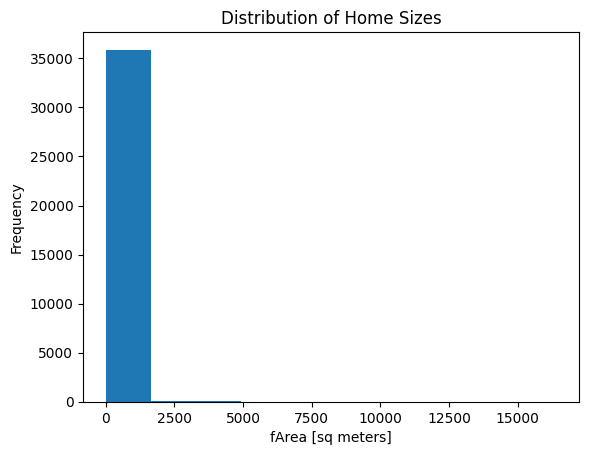

In [107]:
plt.hist(df1["surface_covered_in_m2"])
plt.xlabel("fArea [sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes");
plt.show()

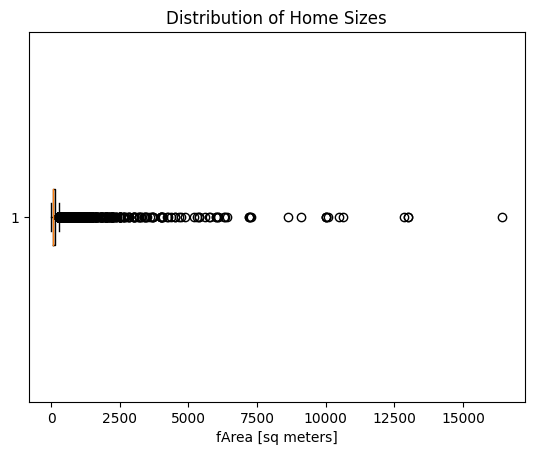

In [106]:
plt.boxplot(df1["surface_covered_in_m2"],vert=False)
plt.xlabel("fArea [sq meters]")
plt.title("Distribution of Home Sizes");
plt.show()

In [98]:
df1.drop(df1[df1["surface_covered_in_m2"]>20000].index,inplace=True)

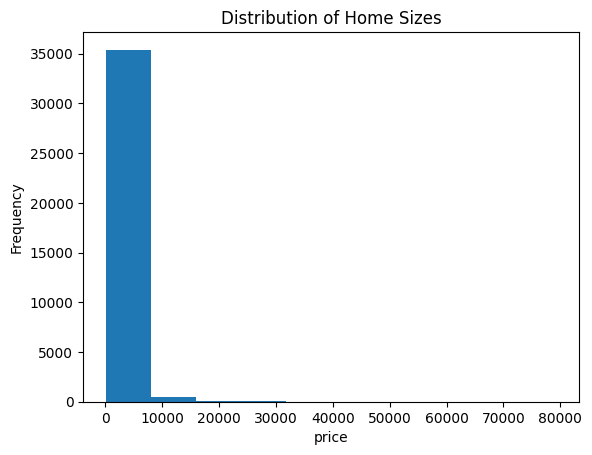

In [105]:
plt.hist(df1["price_aprox_usd"])
plt.xlabel("price")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes");
plt.show()

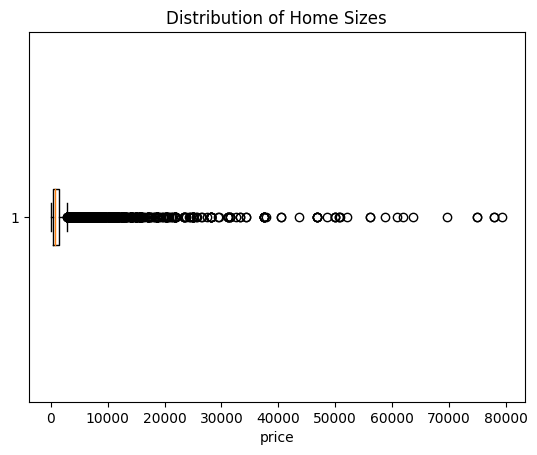

In [104]:
plt.boxplot(df1["price_aprox_usd"],vert=False)
plt.xlabel("price")
plt.title("Distribution of Home Sizes");
plt.show()

In [103]:
df1.drop(df1[df1["price_aprox_usd"]>80000].index,inplace=True)


In [108]:
mean_price_by_state = df1.groupby("states")["price_aprox_usd"].mean().sort_values(ascending = False)
mean_price_by_state

states
Rio de Janeiro         1831.562080
São Paulo              1444.550882
Pernambuco             1116.780791
Amazonas               1095.294667
Bahia                  1095.244006
Espírito Santo          955.064268
Minas Gerais            849.269961
Paraná                  721.076583
Rio Grande do Sul       712.457946
Pará                    706.808293
Mato Grosso             639.700000
Mato Grosso do Sul      629.760833
Ceará                   624.401720
Paraíba                 618.018304
Rio Grande do Norte     607.989306
Maranhão                581.645050
Alagoas                 522.075833
Distrito Federal        498.195464
Santa Catarina          462.747239
Goiás                   423.498848
Piauí                   405.661786
Sergipe                 301.188966
Name: price_aprox_usd, dtype: float64

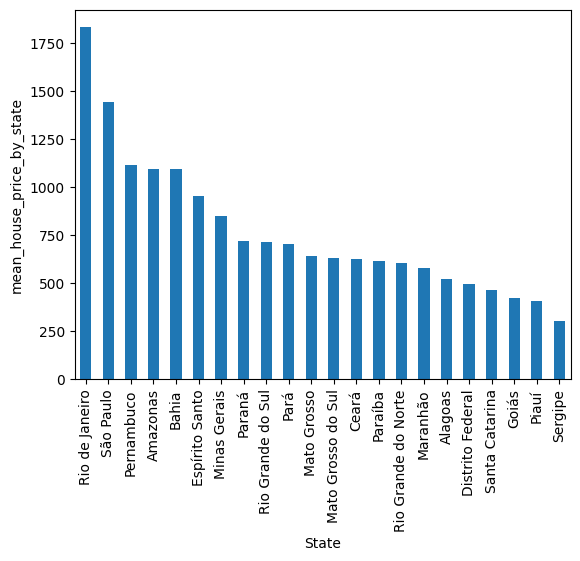

In [109]:
mean_price_by_state.plot(
    kind="bar",
    xlabel="State",
    ylabel="mean_house_price_by_state");

In [110]:
df1["price_per_m2"] = df1["price_aprox_usd"] / df1["surface_covered_in_m2"]

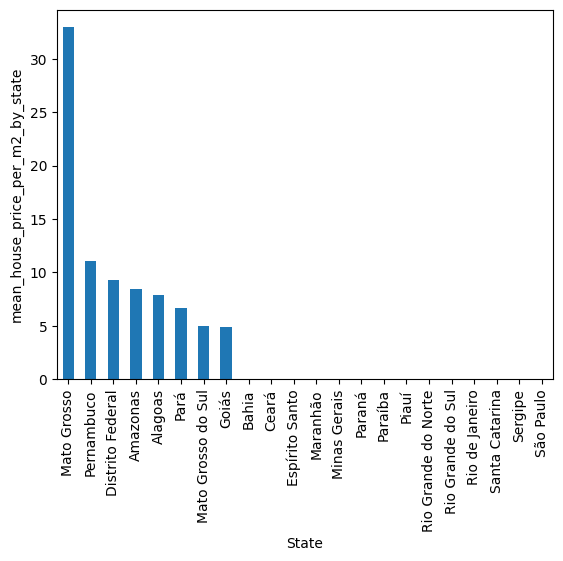

In [111]:
df1.groupby("states")["price_per_m2"].mean().sort_values(ascending=False).plot(
    kind="bar",
    xlabel="State",
    ylabel="mean_house_price_per_m2_by_state");

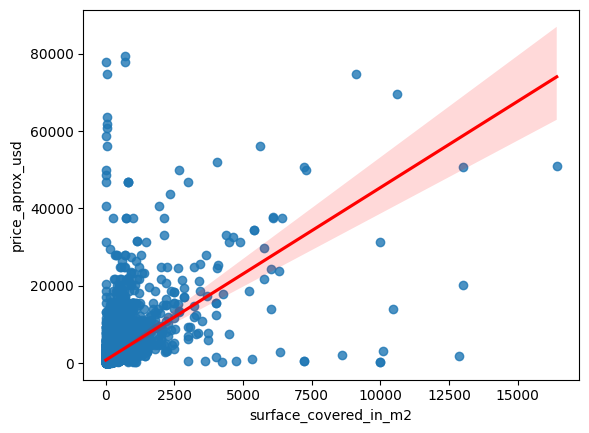

In [112]:
sns.regplot(
    df1,
    x=df1["surface_covered_in_m2"],
    y=df1["price_aprox_usd"],
    line_kws={'color':'red'});

#### thier is a positive strong relation between the area and price

In [113]:
df_brazil_city = df1[df1["states"]=='Rio de Janeiro']

0.5373894745667694


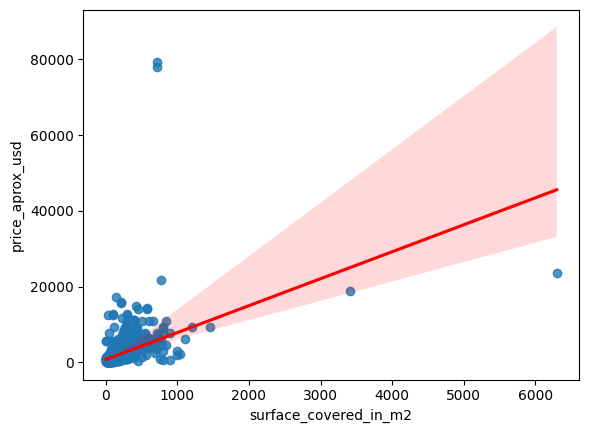

In [115]:
sns.regplot(
    df_brazil_city,
    x=df_brazil_city["surface_covered_in_m2"],
    y=df_brazil_city["price_aprox_usd"],
    line_kws={'color':'red'});
print(df1['surface_covered_in_m2'].corr(df1['price_aprox_usd']))

In [130]:
states_corr = {}
for st in df1['states'].unique():
    states_corr[st] = df1[df1['states']==st]['surface_covered_in_m2'].corr(df1[df1['states']==st]['price_aprox_usd'])
states_corr

{'Rio de Janeiro': 0.4549587724400732,
 'São Paulo': 0.5621948681422012,
 'Ceará': 0.023964968718355174,
 'Espírito Santo': 0.8976151045090572,
 'Paraná': 0.7668474191589413,
 'Santa Catarina': 0.5862041813239971,
 'Bahia': 0.654573935458597,
 'Pernambuco': 0.41357566226930365,
 'Distrito Federal': 0.5530179356681992,
 'Paraíba': 0.6980530795548265,
 'Minas Gerais': 0.7525942612658282,
 'Maranhão': -0.030648897894453707,
 'Sergipe': 0.669404361124202,
 'Goiás': 0.4648179335360018,
 'Rio Grande do Sul': 0.6350441597456448,
 'Rio Grande do Norte': 0.6935922731523613,
 'Mato Grosso do Sul': 0.9223983679301753,
 'Mato Grosso': 0.4484384347511471,
 'Amazonas': 0.910269811077864,
 'Pará': 0.6099205682443656,
 'Alagoas': 0.829668321560068,
 'Piauí': 0.8773587289607994}